# L2. 텍스트의 분포로 벡터화하기(BoW, DTM, TF-IDF, LSA, LDA, 비지도학습 토크나이저)
### 목차
1.단어 빈도를 이용한 벡터화      
(1) Bag of Words       
(2) Bag of Words 구현해보기      
(3) DTM과 코사인 유사도         
(4) DTM의 구현과 한계점        
(5) TF-IDF        
(6) TF-IDF 구현하기        
2. LSA와 LDA        
(1) LSA       
(2) LSA 실습        
(3) LDA     
(4) LDA 실습       
3. 텍스트 분포를 이용한 비지도 학습 토크나이저    
(1) 형태소 분석기와 단어 미등록 문제     
(2) soynlp        

## 3-2. 단어 빈도를 이용한 벡터화 (1) Bag of Words
__벡터화__ (Vectorization): 텍스트를 숫자 벡터로 변환(전처리 과정 중 하나)

- 벡터화 방법
(1) 통계와 머신 러닝을 활용한 방법(오늘 배울 것)        
(2) 인공 신경망을 활용하는 방법

### Bag of Words
- Bag of Words(BoW)             
__자연어 처리(Natural Language Processing)나 정보 검색(Information Retrieval)__ 에서 쓰이는 매우 간단한 단어 표현 방법으로, 문서 내의 단어들의 분포를 보고 이 문서의 특성을 파악하는 기법이다.

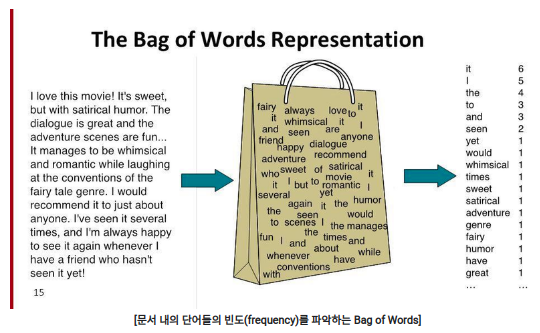

텍스트를 단어 단위로 토큰화를 한 후 순서를 무시한다. BoW는 중복을 제거하지 않고 단어의 빈도 정보를 보존한다. 

```python
# 문서1
doc1 = 'John likes to watch movies. Mary likes movies too.'

# BoW
BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}

# 문서2
doc2 = 'Mary also likes to watch football games.'

# BoW
BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}
```

BoW에서 __각 key는 단어, 각 value는 각 단어가 주어진 문서에 등장한 횟수__ 이다. 문서 내 단어의 순서는 중요하지 않다. 

## 3-4. 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도
- __DTM(Document-Term Matrix)__ : 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것, 즉 각 문서의 등장한 단어의 빈도수를 하나의 행렬로 통합시킨 것이다. 문서를 행, 단어를 열로 가지는 행렬

- TDM(Term-Document Matrix): 행을 단어로, 단어를 행으로 가지는 행렬

>3개의 문서           
문서1: Intelligent applications creates intelligent business processes          
문서2: Bots are intelligent applications          
문서3: I do business intelligence

- 3개의 문서로부터 얻을 수 있는 DTM

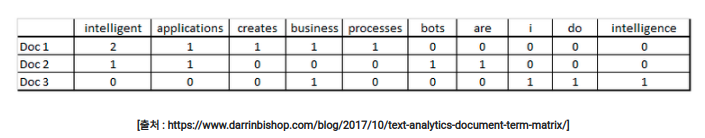

DTM의 __각 행을 문서 벡터, 열을 단어 벡터__ 라고 부른다. 문서의 수가 많아질수록 통합 단어장의 크기도 커지고, DTM의 문서 벡터와 단어 벡터 대부분의 값이 0이 된다. 

DTM을 사용해 각 문서를 비교하고 각 문서 간 유사도를 구할 수 있다.

>문서1 : I like dog     
문서2 : I like cat      
문서3 : I like cat I like cat

![](https://images.velog.io/images/guide333/post/d2de7c4b-6f1e-4991-9612-2b01afd213f3/Screenshot%20from%202021-04-08%2010-37-58.png)

### 코사인 유사도를 사용해 문서 벡터의 유사도 구하기

[Cosine Similarity – 코사인 유사도](https://euriion.com/?p=548)  

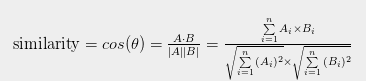

>코사인 유사도: 두 벡터의 사잇각을 코사인으로 구해 유사도로 사용하는 것.       
> - 코사인 유사도의 용도
>1. 검색 엔진에서 검색어(Query)와 문서의 유사도를 구해 가장 유사도가 높은 것을 보여주는 기본 랭킹을 위한 알고리즘        
>2. 텍스트마이닝: 벡터 스페이스 모델 사용, TF-IDF 사용시 단어집합간 유사도를 코사인 유사도를 사용함(TF-IDF와 코사인유사도는 밀접한 관계). Word2Vec에서도 나옴     
>3. 분석, 수리모형에서 유사도 구할 때 가끔 사용     
>4. 클러스터링(군집화) 모델에서 데이터 포인트를 서로 묶을 때 사용
>
> 코사인 유사도의 특징: 벡터의 각이 작을수록 1, 클수록 0에 가까워짐. 직교이면 0.


- DTM에서 Document끼리의 코사인 유사도를 계산하기 위해 필요한 두 가지 전제 조건    
1) 두 벡터의 원소들이 모두 양수 2) 벡터의 원소수가 같아야 함. 비교하는 벡터의 원소 갯수가 일치하지 않으면 0으로 빠진 부분을 채워서 동일하게 만들어야 한다. 벡터의 원소 갯수가 좌표축의 갯수이기 때문이다. 

DTM에서 코사인 유사도는 0 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다.

### DTM의 한계점
DTM은 Bag of words를 기반으로 문서를 비교할 수 있는 행렬이다. 

- DTM의 2가지 한계점
1. DTM에서 문서와 단어의 수가 늘어나면 행과 열은 대부분 0이 된다. 이는 저장 공간 차원에서 낭비이며, 차원의 저주라는 문제를 일으킨다.    
2. 단어의 빈도에만 집중하기 때문에 중요한 단어와 중요하지 않은 단어의 구분이 어렵다. (예: 불용어 'the'는 어느 문서에도 자주 등장한다. 그렇다면 모든 문서가 유사한가? NO!)

## 3-6. 단어 빈도를 이용한 벡터화 (5) TF-IDF
### TF-IDF
TF-IDF(Term Frequency-Inverse Document Frequency)는 모든 문서에서 자주 등장하는 단어(예: 불용어)는 중요도가 낮다고 판단하고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단해 가중치를 준다. 그러나 TF-IDF가 DTM보다 성능이 뛰어나지는 않다. 

TF-IDF는 우선 DTM을 만든 후 TF-IDF의 가중치를 DTM에 적용하는 방식으로 사용한다.

### TF-IDF 계산

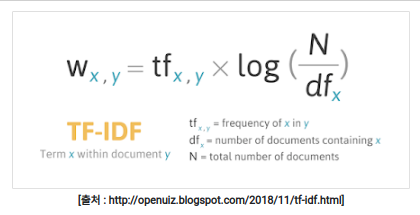

y: 문서, x: 단어, TF: 긱 문서에 등장하는 단어의 빈도, df: x(단어)를 포함하는 문서의 수, N: 총 문서의 갯수, IDF: $log(\frac {N}{df})$

- 계산
>Question. 전체 문서의 수가 5개. 단어 'like'가 문서2에서 200번, 문서 3에서 300번 등장했다고 하자. 다른 문서에서 단어 'like'는 등장하지 않음

- 문서2에서의 like의 TF-IDF = 200 x log($\frac {5}{2}$) = 183.258146375        
- 문서3에서의 like의 TF-IDF = 300 x log($\frac {5}{2}$) = 274.887219562

[TF-IDF 문서 유사도 측정](https://www.youtube.com/watch?v=Rd3OnBPDRbM&t=2s)

>각 문서에서의 TF-IDF(각 단어의 TF-IDF를 구하고 그것을 행렬로 표햔) 행렬을 구하고 코사인 유사도를 구해 각 문서의 유사도를 계산함. 
>
>- TF-IDF bag of words의 장점: 문서간 유사도를 구하기 쉽다. 중요한 단어의 점수를 유지하고, 여러 문서에 자주 등장하지만 중요하지 않은 단어의 점수는 낮춰줌.   
>- 단점: 단어 기반(단어간 유사도는 보지 않음), 문서의 주제를 알 수 없음. 다른 단어지만 같은 의미를 가진 단어를 다루지 못함.(다른 단어로 쓰인 같은 의미의 문장의 유사도는 0)  
>- 해결방안: LSA, Word Embedding(Word2Vec, Glove), ConceptNet


- TF 함수, IDF 함수, TF-IDF 함수 만들기    
IDF를 실제 구현시 log항의 분모가 0이 되는 상황(특정 단어가 전체 문서에서 등장하지 않는 경우)을 방지하기 위해 분모에 1을 더해준다. 또한 log 항의 분모와 분자가 같을 경우 IDF가 0이 되는 것를 방지하기 위해 Log 항에 1을 더한다. 

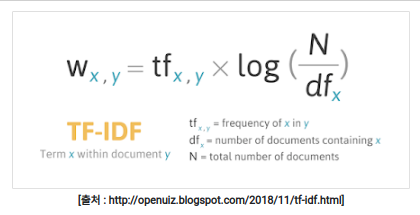

## 3-8. LSA와 LDA (1) LSA
DTM과 TF-IDF 행렬 같이 Bag of Words를 기반으로 한 표현 방법은 특정 단어가 포함된 문서를 찾아내는 것은 빠르게 할 수 있으나 단어의 의미를 벡터로 표현하지 못한다. 특정 단어(단어의 의미)와 관련된 문서 집합(문서의 주제)을 찾거나 문서의 의미와 주제를 알고 싶다면 LSA를 사용할 수 있다. 

### LSA
LSA(Latent Semantic Analysis, 잠재 의미 분석)은 __전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술__ 이다. LSA를 사용하면 __단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수__ 를 찾아낼 수 있으며 bag of words 기반 방법보다 효과적이다. 

### 특이값 분해
LSA를 이해하려면 선형대수학의 특이값 분해(Singular Value Decomposition)을 이해해야 한다. 

![](https://images.velog.io/images/guide333/post/5cfeb00e-c725-4842-aedb-66a6b9dee5c0/Screenshot%20from%202021-04-08%2013-43-28.png)

특이값 분해는 m x n 크기의 임의의 사각 행렬 A를 특이 벡터(Singular vector)의 행렬과 특이값(Singular value)의 대각 행렬로 분해하는 것이다. 

[특이값 분해 ( SVD ) 매트랩 예제 및 쉬운 이해! Singular value decomposition 의 목적](https://www.youtube.com/watch?v=vxJ1MzfvL5w)
>특이값 분해를 하는 이유와 그 의미    
>1. 행렬의 크기 감소   
>2. 정방행렬이 아닌 행렬의 해를 구할 수 있다.    
>3. 데이터의 크기를 줄여준다.
> 특이값 분해를 하면 모든 성분이 가치가 높은 순으로 정렬되어 분해됨. 가치가 낮은 부분은 truncate로 제거, 그리고 다시 복원한다. 

[3.4 특잇값 분해](https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html)

>정방행렬은 고유분해로 고유값과 고유벡터를 찾을 수 있지만 정방행렬이 아닌 행렬은 고유분해가 불가능하므로 특이값 분해를 한다. (어떤 행렬도 특이값 분해를 할 수 있다.)
>$A=UΣV^T$  
>
>Σ: 대각성분이 양수인 대각행렬, 큰 수부터 작은 수 순서로 배열됨. $Σ \in \mathbf {R}^{NxM}$        
>U: N차원 정방행렬, 모든 열벡터가 단위벡터이고 서로 직교한다. $U \in \mathbf {R}^{NxN}$       
>V: M차원 정방행렬, 모든 열벡터가 단위벡터이고 서로 직교한다. $V \in \mathbf {R}^{MxM}$      
>
>위 조건을 만족하는 __행렬 Σ의 대각성분들을 특잇값__ (singular value), __행렬 U의 열벡터들을 왼쪽 특이벡터__ (left singular vector), __행렬 V의 행벡터들을 오른쪽 특이벡터__ (right singular vector).

특잇값 가운데 가장 큰(가장 중요한) t개만 남기고 해당 특잇값에 대응되는 __특이행렬(singular vector)__ 로 행렬 A를 근사(approximate)한 것을 __절단적 특잇값 분해(Truncated SVD)__ 라고 한다. 

Truncated SVD를 수행하면 행렬 Σ의 대각 원솟값 중에서 상윗값 t개만 남고 U행렬과 V행렬의 t열까지 남는다. 이로 인해 세 행렬에서 __값(정보)의 손실__ 이 일어나 기존의 행렬 A를 정확히 복구할 수는 없다. 여기서 t는 하이퍼파라미터(사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수)이다. t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 노이즈를 제거하려면 t를 작게 잡아야 한다. 

### LSA와 Truncated SVD

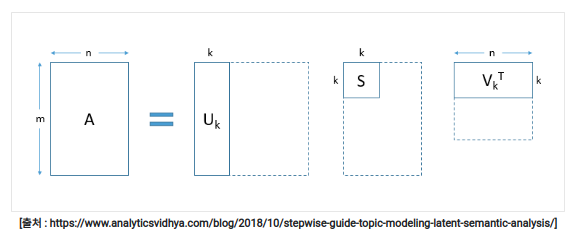

$$A = USV^T$$

LSA는 DTM이나 TF-IDF 행렬 등에 Truncated SVD를 수행한다. 분해하여 얻은 행렬 3개($U, S, V^T$)는 각각 __'문서들과 관련된 의미들을 표현한 행렬', '각 의미의 중요도를 표현한 행렬', '단어들과 관련된 의미를 표현한 행렬'__ 이다. 

#### 그림설명(Truncated SVD, k: 하이퍼파라미터)       
- m: 문서의 수, n: 단어의 수          
- $U_k$: m x k 의 크기의 행렬. 문서의 수 m의 크기는 줄어들지 않는다. $U_k$의 각 행은 각 문서를 표현하는 문서 벡터이다. 
- $V_k^T$: k x n의 크기를 가지는 행렬. 단어의 수 n은 줄어들지 않는다. 행렬의 각 열은 각 단어를 나타내는 m차원의 단어 벡터이다. 단어 벡터의 차원이 m(행렬 A)에서 k로 축소된다. (벡터의 차원을 저차원으로 축소하면서 잠재된 의미를 끌어내는 여러 방법은 '워드 임베딩'을 배울 때 자세히 배울 것)

DTM이나 TF-IDF 행렬에 Truncated SVD를 수행하고 얻은 $V_k^T$ 행렬의 k열은 __전체 코퍼스로부터 얻어낸 k개의 주요 주제__ 이다.  

행렬 $V_k^T$가 k x (단어의 수)의 크기를 가진다. 각 행을 전체 코퍼스의 k개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력한다.

DTM이나 TF-IDF 행렬에 Truncated SVD를 수행하고 얻은 $V_k^T$ 행렬의 k열은 __전체 코퍼스로부터 얻어낸 k개의 주요 주제__ 이다.  

## 3-10. LSA와 LDA (3) LDA
LSA를 통해 한 것처럼 전체 코퍼스로부터 주요 주제, 즉 토픽을 찾아내는 과정을 __토픽 모델링(Topic Modeling)__ 이라고 한다. 많은 문서에서 주요 주제를 알아내는 일이 중요할 때 사용한다. 

__잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)__ 는 토픽 모델링의 대표적인 알고리즘이다. LDA는 문서들이 토픽의 혼합으로 구성되어 있고, 토픽은 확률 분포에 기반해 단어를 생성한다고 가정한다. 데이터가 주어지면 LDA는 이 가정에 따라 단어의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아낸다. 

### LDA(Latent Dirichlet Allocation) 시뮬레이션
- [LDA Topic Modeling Simulation](https://lettier.com/projects/lda-topic-modeling/)

1. '+ Add Document'를 통해 다수의 단어로 구성된 문서 추가
2. 좌측의 'Topics'의 값 지정.  코퍼스에서 몇 개의 주제를 얻을 것인지 정하는 하이퍼파라미터.
3. 'Run LDA'를 누르고 결과로 나오는 두 개의 행렬 확인

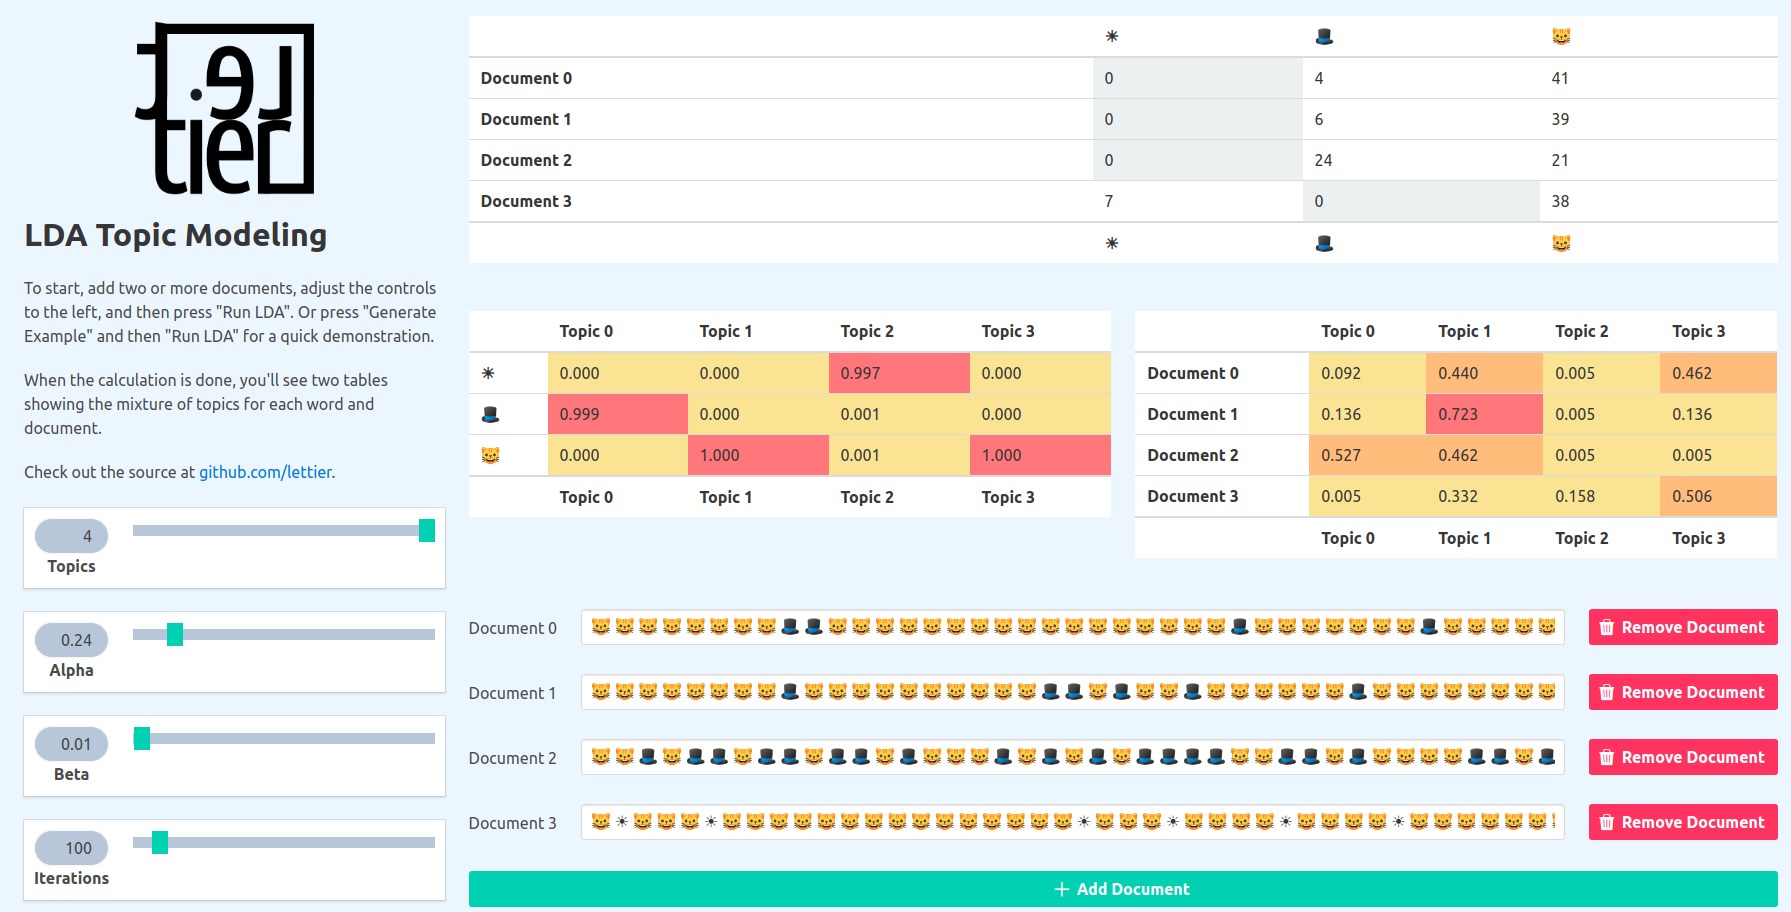

- 첫번째 행렬: 행은 단어 집합의 단어, 열은 토픽
- 두번째 행렬: 행은 문서, 열은 토픽

### LDA(Latent Dirichlet Allocation)의 두 가지 결과
LDA는 __각 토픽의 단어 분포와 각 문서의 토픽 분포__ 를 추정한다.

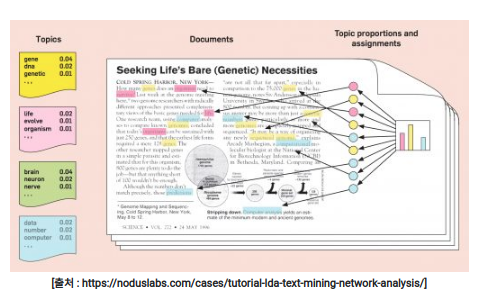

LDA는 각 토픽의 단어 분포, 즉 특정 토픽에 특정 단어가 나타날 확률을 추정한다. 위의 그림에서 "Topics"는 각 토픽에서 각 단어가 등장할 확률을 보여준다. 그림 중앙의 'Documents"에는 노란색, 분홍색, 하늘색의 3가지 토픽이 존재하며, 노란색이 가장 많다. 그림 오른쪽의 "Topic proportions and assignments"의 막대 그래프는 문서에 존재하는 토픽의 비율을 시각화한 그래프이다. 그래프에 따르면 이 문서는 노란색 토픽의 단어가 가장 많이 등장하므로 노란색 토픽을 가지고 있을 가능성이 높다. LDA는 단어의 분포로부터 해당 문서의 토픽 분포를 추정한다. 

[위키독스: 잠재 디리클레 할당](https://wikidocs.net/30708): 길어서 정리는 따로!

###  LDA의 가정    
LDA는 문서의 집합에서 어떤 토픽이 존재하는지 알아내는 알고리즘이다. LDA는 BoW의 행렬 DTM 또는 TF-IDF 행렬을 입력으로 하며, 이로부터 LDA가 단어의 순서에는 신경쓰지 않음을 알 수 있다. LDA는 각각의 문서가 아래의 과정을 거쳐 작성되었다고 가정한다. 

1) 문서에 사용할 단어의 개수 N을 정한다. (여기서는 5라 가정)              
2) 문서에 사용할 토픽의 혼합을 확률 분포에 기반해 결정한다.(토픽이 2개면 강아지 토픽을 60%, 과일 토픽을 40%로 선택)         
3) 문서에 사용할 각 단어를 아래와 같이 정한다.    
3-1) 토픽 분포에서 토픽 T를 확률적으로 고른다.(60% 확률로 강아지 토픽을 선택하고 40%의 확률로 과일 토픽을 선택할 수 있다.)     
3-2) 선택한 토픽 T에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고른다.(강아지 토픽을 선택하면 33%의 확률(??왜 이렇게 나와??)로 단어 강아지를 선택) 이 과정을 반복하며 문서를 완성한다. 

이 과정을 통해 문서가 작성되었다는 가정 하에 LDA는 토픽을 뽑아내려고 위 과정을 역으로 추적하는 역공학(reverse engneering)을 수행한다.

###  LDA 수행과정
1. 사용자는 알고리즘에게 토픽의 개수 k(하이퍼파라미터)를 알려준다. LDA는 토픽의 개수를 입력받으면 k개의 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정한다.
2. 모든 단어를 k개 중 하나의 토픽에 랜덤으로 할당한다.     
이 작업이 끝나면 각 문서는 토픽을 가지고 토픽은 단어 분포를 가진 상태다. 그러나 각 단어가 랜덤으로 토픽에 할당되었으므로 이 결과는 전부 틀리다. 
3. 모든 문서의 모든 단어에 대해 아래를 반복 진행한다. (iterative)   
3-1. 어떤 문서의 각 단어 w는 자신이 잘못된 토픽에 할당되어 있지만 다른 단어는 전부 올바른 토픽에 할당된 상태라고 가정한다. 따라서 단어 w는 아래의 두 기준에 따라 토픽이 재할당된다. 
- 첫번째 기준 p(topic t | document d): 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- 두번째 기준 p(word w | topic t): 각 토픽 t에서 해당 단어 w의 분포(전체 문서 확인)

이를 반복하면 모든 할당이 완료된 수렴 상태가 된다. 

- LSA와 LDA의 매커니즘의 한 줄 요약
  - LSA : DTM을 차원 축소하여 근접 단어들을 토픽으로 묶는다.
  - LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출한다.
  
[55. 텍스트 데이터 분석 [토픽 모델] - (4) LDA 모형](https://serviceapi.nmv.naver.com/flash/convertIframeTag.nhn?vid=A008B9E1EAFC02C99F92928155487839090E&outKey=V1210ad4156cf64ce0c6a3e18cecaae499f6528784c999ca6541c3e18cecaae499f65&width=544&height=306): 이것도 따로 정리!

## 3-12. 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제
텍스트의 분포를 이용해 토큰화를 수행하는 __비지도 학습 토크나이저__ 를 알아보자.

### 형태소 분석기의 필요성
- 한국어의 특성    
한국어는 교착어이다. 교착어란 하나의 낱말(엄밀히 하나의 어절)이 하나의 어근(ROOT)(혹은 어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합으로 이루어진 언이이다. 

낱말(어절) = 어근(어간) + 1개 이상의 접사

이런 특성 때문에 조사나 접사가 존재하고 띄어쓰기 단위 토큰화가 제대로 동작하지 않는다. 

- 영어와 한국어의 띄어쓰기 단위 토큰화의 비교

4번 나온 '사과'라는 단어가 모두 '의', '를', '가', '랑' 등이 붙어 있어 기계가 모두 다른 단어로 인식한다. 이를 해결하기 위해 한국어는 주로 형태소 분석기를 사용한다. 

- ```Okt```사용해 형태소 분석하기
- 공식문서: [Installation -- KoNLPy](https://konlpy.org/en/latest/install/)

- ```konply``` 패키지 설치: ```$ pip install konlpy```

### 단어 미등록 문제
기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 새롭게 만든 단어를 인식하기 어렵다는 특징이 있다. 

형태소 분석기를 사용하면 하나의 단어인 '모두의연구소'를 전부 분리한다. 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 계속 함께 등장하면 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기가 바로 soynlp이다. 

## 3-13. 텍스트 분포를 이용한 비지도 학습 토크나이저 (2) soynlp
soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기이다. __비지도 학습__ 으로 형태소 분석을 한다는 특징이 있고, 데이터에 자주 등장하는 단어를 형태소로 분석한다. soynlp 형태소 분석기는 내부적으로 __단어 점수표__ 로 동작하며, 이 점수는 __응집 확률(cohesion probability)__ 와 __브랜칭 엔트로피(branching entropy)__
를 활용한다. 

soynlp는 비지도학습 형태소 분석기이므로 학습 과정을 거친다. 따라서 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이 필요하다. ```WordExtractor.extract()```를 통해서 전체 코퍼스에 대해 단어 점수표를 계산한다.

### soynlp의 응집 확률(cohesion probability)
- 응집확률       
내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도.
문자열을 문자 단위로 분리해 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산해 누적곱을 한 값. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스가 하나의 단어로 등장할 가능성이 높다.

![](https://images.velog.io/images/guide333/post/cfc7de3d-d07a-4b2d-b4e8-b1c001b33d2d/Screenshot%20from%202021-04-08%2023-28-23.png)

- 길이 7인 문자 시퀀스 '반포한강공원에'의 각 내부 문자열의 스코어를 계산하는 과정
![](https://images.velog.io/images/guide333/post/4d7cca13-2079-4e31-b5b7-314473ece885/Screenshot%20from%202021-04-08%2023-28-28.png)

### soynlp의 브랜칭 엔트로피(branching entropy)
- 브랜칭 엔트로피    
확률 분포의 엔트로피값 사용. 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도. 주어진 문자 시퀀스에서 다음 문자 예측을 위해 혼동되는 정도. 

브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있으므로 점차 줄어든다. 


soynlp 패키지는 계산한 점수를 사용해 두 가지 문자열 토큰화 방법을 제공한다.

### soynlp의 LTokenizer
L 토크나이저(LTokenizer)를 사용해 __띄어쓰기 단위로 잘 나뉜 문장__ 을 얻을 수 있다.

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가지는 경우가 많다. 
- '공원에' = '공원 + 에'
- '공부하는' = '공부 + 하는'

L 토크나이저는 L 토큰 + R 토큰으로 나눌 때, __분리 기준__ 으로 __점수가 가장 높은 L 토큰__ 을 찾아내는 원리를 가지고 있다.

### 최대 점수 토크나이저
최대 점수 토크나이저(MaxScoreTokenizer)는 __띄어쓰기가 되어 있지 않은 문장__ 에서 __점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저__ 이다.